# Examining the Housing Crisis In Vancouver 

## Introduction 

As known that the housing market in Vancouver is one of the most cost-expensive areas to live in Canada, how do areas within compare? Historically, it shows that the West side of Vancouver is the affluent area as it is known to be closer to local beaches with timeless scenic views. However, there has been a significant boom in attraction as of recently towards the East side as it provides a sense of friendly community in the prominent working areas.


But what possible aspects could be attributing to this shift in the housing market between East and West Vancouver? The Eastside does not fail with its close proximity to popular neighborhoods and offers a diverse and welcoming community as a popular business district for the working class and educated professionals especially. In specific, the attraction of the East roots from the welcoming communities in various neighborhoods that are brought by single-family homes: a private residence occupied by a single household unit. Based on the last few years, the prices of single-family homes have increased slightly more on the East side at 12.4% than the West at a 12.2% growth (Pablo, C. 2021). In addition, for the given number of members that occupy the space, single-family homes consume more land, and have often been attributed as the cause of housing crises in many areas ((Glaeser & Gyourko, 2002) & (Schuetz, 2020)). This has ultimately led us to ponder: 

**Do the East and West sides of Vancouver display differences in the median land values and proportion of single-family homes?** 

To explore this question and the relation between land value in an area and the proportion of single-family housing in that area, we analyzed the [Property Tax Report](https://opendata.vancouver.ca/explore/dataset/property-tax-report/analyze/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6InByb3BlcnR5LXRheC1yZXBvcnQiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImN1cnJlbnRfbGFuZF92YWx1ZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMjc5QjEifV0sInhBeGlzIjoiY3VycmVudF9sYW5kX3ZhbHVlIiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D) from the City of Vancouver. Among the many years that property taxes have been documented, this report will solely study the year of 2021 to investigate the present housing market. This dataset contains information on current land value, report year, neighborhood code and zoning classifications alongside various attributes of the properties from BC Assessment and City sources. Of the many zoning classifications, we will strictly be working with residential homes as the question investigates the study of the following: 

1. Single-family Dwelling – a private residence occupied by a single household unit 

2. Two-family Dwelling – independent residences designed to be occupied by two families 

3. Multiple Dwelling – residential duplexes, apartment buildings, condos, etc., that are designed to house three or more families in one structure

4. Comprehensive Development Areas – comprising two or more residential or non-residential areas

Through the dataset, we will utilize the current land value, and the response variable to analyze the following parameters: median value of houses in the particular area and the proportion of single family housing, to support the conclusion of the stated question. This report will analyze the median as our primary measure of center rather than the mean, as it is possible for the mean value to be influenced by outlier housing values.

 From the information gathered, the results expected to be found is that median land values on the West Side tend to be noticeably higher compared to the median land values on the East Side and a statistically significant difference in the proportion of single-family dwellings between the two sides of Vancouver. 
Specifically, there will be a significant difference for both aspects, as the West side, which is the area expected to have a higher median land value, is also expected to have a higher proportion of single-family dwellings from our findings. 


## Preliminary Results

In [1]:
#installing and loading necessary libraries
library(tidyverse)
library(repr)
library(digest)
library(infer)
install.packages("cowplot")
install.packages("data.table", dependencies=TRUE)
require(data.table)
library(data.table)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message in install.packages("cowplot"):
“installation of package ‘cowplot’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘RcppCCTZ’, ‘RcppDate’, ‘R.utils’, ‘nanotime’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




## Part 1: Proportion of Single Family Residential Homes in East and West sides of Vancouver

### 1. a) Preprocessing and EDA

First, we load the dataset and set the seed to make it reproducible.

In [2]:
set.seed(9844)
url <- "https://opendata.vancouver.ca/explore/dataset/property-tax-report/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B"
housing_data_1 = fread(url, sep=";")
housing_data = setDF(housing_data_1)
#the dataset takes a significant amount of time to load due to its size

We will filter the dataset to look only at residential neighbourhoods in 2021.

In [3]:
land_value_data <- housing_data %>% filter(REPORT_YEAR == 2021) %>%
    select(ZONING_CLASSIFICATION, NEIGHBOURHOOD_CODE, CURRENT_LAND_VALUE) %>%
    filter(ZONING_CLASSIFICATION %in% c('Multiple Dwelling','One-Family Dwelling','Comprehensive Development', "Two-Family Dwelling"))
land_value_data <- na.omit(land_value_data) 
head(land_value_data, 3)

,ZONING_CLASSIFICATION,NEIGHBOURHOOD_CODE,CURRENT_LAND_VALUE
,<chr>,<int>,<int64>
1,Multiple Dwelling,12,390000
2,Multiple Dwelling,13,416000
3,One-Family Dwelling,3,2126000


Table 1. Residential Neighbourhoods in 2021

Next, we will filter the dataset to separate it into the East and West sides of Vancouver. It was found through the [Vancouver Property Map](https://maps.vancouver.ca/property/), that codes 13-25 were located on the East side and codes 1-12 and 26-30 were based in Downtown and the West ends of Vancouver. Afterwards, we take a sample of 500 from each data set to get a random sample from the population.

In [4]:
land_value_data <- land_value_data %>% 
  mutate(location = case_when(
    between(NEIGHBOURHOOD_CODE, 1, 12) ~ "west",
    between(NEIGHBOURHOOD_CODE, 13, 25) ~ "east",
    between(NEIGHBOURHOOD_CODE, 26, 30) ~ "west",
    TRUE ~ NA_character_)) %>%
    select(-NEIGHBOURHOOD_CODE)
head(land_value_data, 3)

,ZONING_CLASSIFICATION,CURRENT_LAND_VALUE,location
,<chr>,<int64>,<chr>
1,Multiple Dwelling,390000,west
2,Multiple Dwelling,416000,east
3,One-Family Dwelling,2126000,west


Table 2. One-Family Dwellings Separated by East and West Locations

In [5]:
set.seed(123)

west_value_2021 <- filter(land_value_data, location == "west")

east_value_2021 <- filter(land_value_data, location == "east")

west_2021_sample <- 
    west_value_2021 %>% 
    rep_sample_n(reps = 1, size = 500, replace = FALSE) %>% 
    ungroup()

east_2021_sample <- 
    east_value_2021 %>% 
    rep_sample_n(reps = 1, size = 500, replace = FALSE) %>% 
    ungroup()

After creating a sample for both the West and East sides, we can make a bar graph to quickly inspect the proportions of the sample.

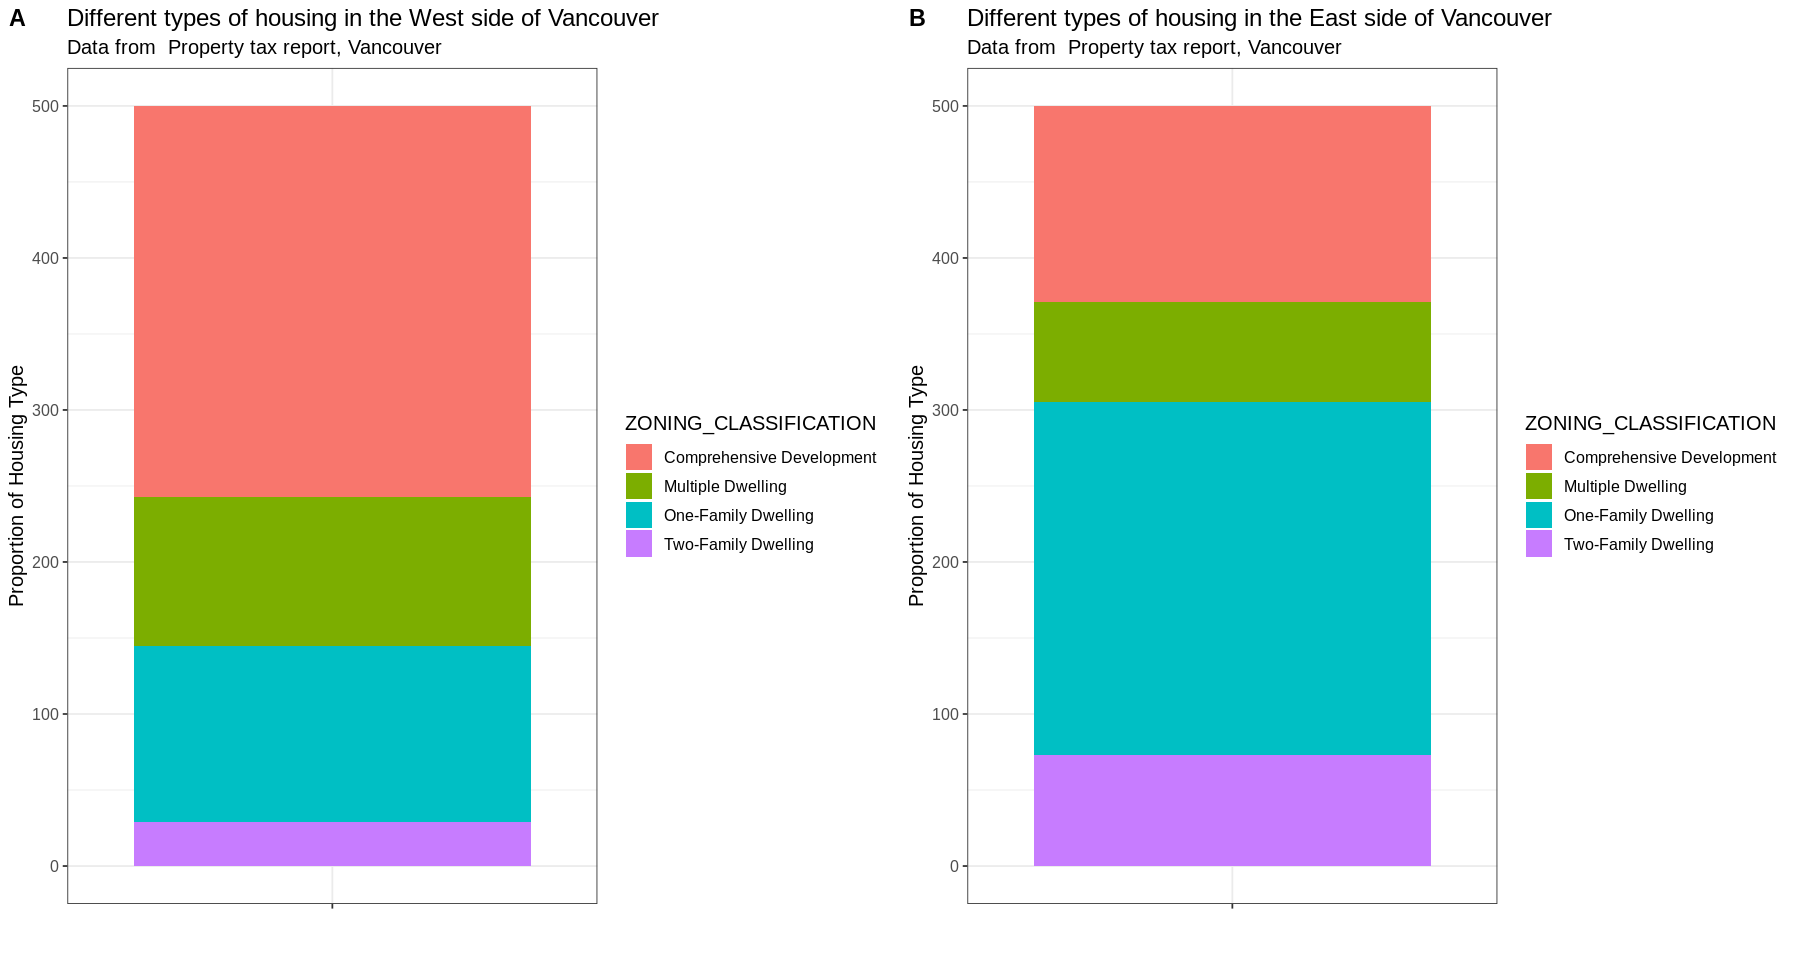

In [6]:
library(cowplot)

options(repr.plot.width = 15, repr.plot.height = 8)

west_plot <- ggplot(data = west_2021_sample) +
    geom_bar(mapping = aes(fill = ZONING_CLASSIFICATION, x="", y = ..count..), stat = "count") +
    theme_bw()+
labs(x="", y="Proportion of Housing Type", title = "Different types of housing in the West side of Vancouver", subtitle="Data from  Property tax report, Vancouver")+
theme(text = element_text(size = 12))

east_plot <- ggplot(data = east_2021_sample) +
    geom_bar(mapping = aes(fill = ZONING_CLASSIFICATION, x="", y = ..count..), stat = "count")+theme_bw()+
labs(x="", y="Proportion of Housing Type", title = "Different types of housing in the East side of Vancouver", subtitle="Data from  Property tax report, Vancouver")+
theme(text = element_text(size = 12))

plot_grid(west_plot, east_plot, ncol=2, labels="AUTO")

Figure A. The count of each Zoning Classification in East and West Side Vancouver respectively


Upon a quick inspection, there is a clear difference in the proportion of single-family dwellings, as the East side has a much larger proportion. Now we will calculate the proportion of residential homes in each side of Vancouver zoned ""One-Family Dwelling"

In [7]:
prop_west <- west_2021_sample %>% 
    filter(ZONING_CLASSIFICATION == "One-Family Dwelling") %>% 
    summarize(n=n()) %>%
    mutate(proportion = n / 500)

prop_w <- prop_west$proportion

prop_west

n,proportion
<int>,<dbl>
116,0.232


Table 3. Proportion of One-family Dwellings in West Vancouver

In [8]:
prop_east <- east_2021_sample %>% 
    filter(ZONING_CLASSIFICATION == "One-Family Dwelling") %>% 
    summarize(n=n()) %>%
    mutate(proportion = n / 500)

prop_e <- prop_east$proportion

prop_east

n,proportion
<int>,<dbl>
232,0.464


Table 4. Proportion of One-Family Dwellings in East Vancouver

Next, the standard error and a confidence interval for each parameter is calculated.

In [9]:
se_w <-sqrt((prop_w*(1-prop_w)/500))

 west_ci <-
    tibble(
        lower_ci = qnorm(0.025, prop_w, se_w),
        upper_ci = qnorm(0.975, prop_w, se_w)
    )
west_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.1950012,0.2689988


Table 5. Confidence Interval for the Proportion of One-family Dwellings in West Vancouver

In [10]:
se_e <- sqrt((prop_e*(1-prop_e)/500)) #standard errror

east_ci <-
    tibble(
        lower_ci = qnorm(0.025, prop_e, se_e),
        upper_ci = qnorm(0.975, prop_e, se_e)
    )
east_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.4202876,0.5077124


Table 6. Confidence Interval for the Proportion of One-family Dwellings in East Vancouver

To conduct the permutation test using a trustworthy workflow, we had to do additional processing of the dataset. First the dataset was binded together to divide location into west and east, for both a sample taken and the entire dataset. 

In [11]:
sample_2021 <- rbind(west_2021_sample, east_2021_sample) 

land_binded_data <- 
    rbind(west_value_2021 %>% mutate(location = "west"), east_value_2021 %>% mutate(location = "east")) %>%
    select(ZONING_CLASSIFICATION, location)

For both the whole dataset and sample, we divided the zoning classification into one family dwellings versus non one family dwellings. Then we calculated the number of each for both west and east sides of Vancouver. 

In [12]:
land_binded_data$ZONING_CLASSIFICATION[land_binded_data$ZONING_CLASSIFICATION %in% c('Multiple Dwelling','Comprehensive Development', "Two-Family Dwelling")] <- "Non-One Family Dwelling"
land_binded_data %>%
    group_by(ZONING_CLASSIFICATION, location) %>%
    tally() %>%
    spread(location, n)

sample_2021$ZONING_CLASSIFICATION[sample_2021$ZONING_CLASSIFICATION %in% c('Multiple Dwelling','Comprehensive Development', "Two-Family Dwelling")] <- "Non-One Family Dwelling"
sample_2021 %>%
    group_by(ZONING_CLASSIFICATION, location) %>%
    tally() %>%
    spread(location, n)

ZONING_CLASSIFICATION,east,west
<chr>,<int>,<int>
Non-One Family Dwelling,40106,81153
One-Family Dwelling,39258,26955


ZONING_CLASSIFICATION,east,west
<chr>,<int>,<int>
Non-One Family Dwelling,268,384
One-Family Dwelling,232,116


Tables 7 and 8. Sum of One-Family Dwellings and other types of housing in the population and sample

### 1. b) Hypothesis Testing

Finally, to test if there is a difference in the proportion of single family homes on the east and west sides, we will conduct both a permutation test and a two-sample z-test at a 5% significance level. The 5% significance level was chosen to reduce the probability of committing a type 1 error. 

$H_{0}$ = The proportion of single-family homes between East and West sides of Vancouver are equal

$H_{a}$ = The proportion of single-family homes between East and West sides of Vancouver are not equal
    

The observed difference in proportion is calculated below. 

In [13]:
obs_diff_in_prop <- land_binded_data %>%
    specify(formula = ZONING_CLASSIFICATION~location, success = "One-Family Dwelling") %>%
    calculate(stat = "diff in props", order = c("west", "east"))
obs_diff_in_prop

stat
<dbl>
-0.2453235


Table 9. Observed Difference in Proportion

### i) Permutation Test

The permutation test was used because it is a non-parametric test that does not rely on the data coming from any underlying distribution. 

In [14]:
null_diff_in_props <- sample_2021 %>%
    specify(formula = ZONING_CLASSIFICATION~location, success = "One-Family Dwelling") %>%
    hypothesize(null = "independence") %>%
    generate(reps = 5000, type = "permute") %>%
    calculate(stat = "diff in props", order = c("west", "east"))

Bootstrapping was used to calculate a 95% confidence interval for the observed test statistic below. 

In [15]:
bootstrap_diff_prop <- sample_2021 %>%
    specify(formula = ZONING_CLASSIFICATION~location, success = "One-Family Dwelling") %>%
    generate(reps = 5000, type = "bootstrap") %>%
    calculate(stat = "diff in props", order = c("west", "east")) 

In [16]:
bootstrap_ci <- bootstrap_diff_prop %>%
    get_confidence_interval(level = 0.95, type = "percentile")
bootstrap_ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.2899135,-0.1743113


Table 10. Bootstrapping Confidence Interval

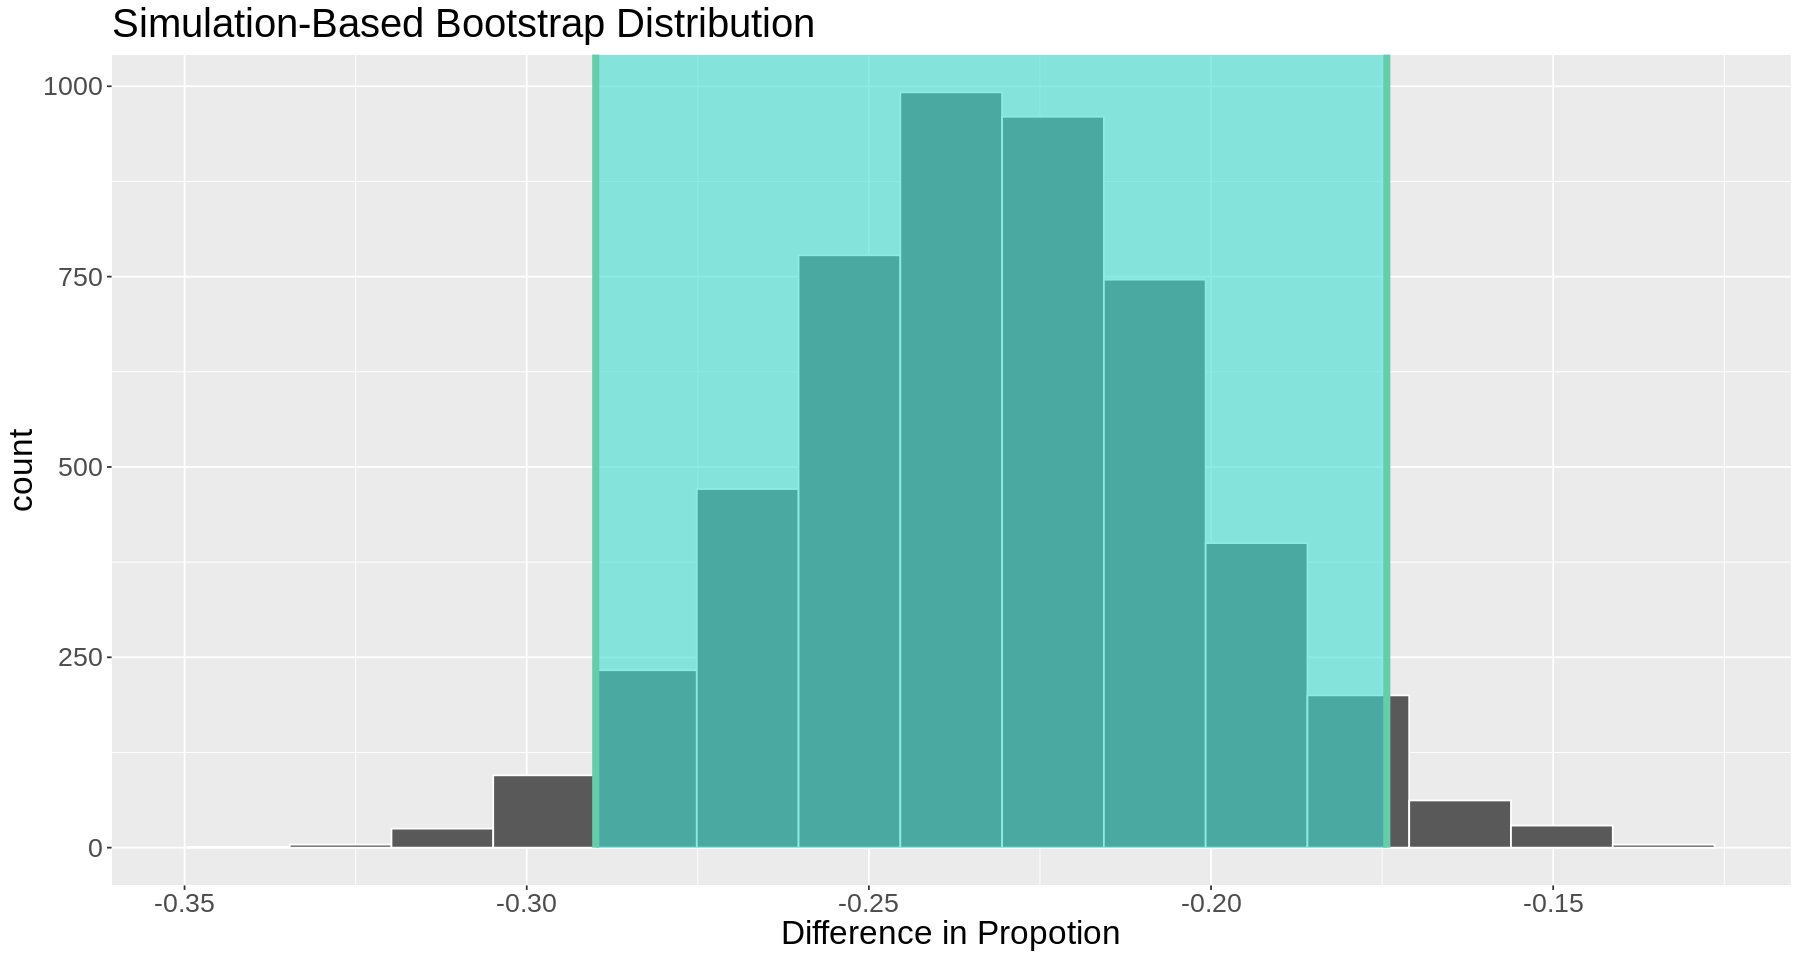

In [17]:
bootstrap_ci_plot <-
    visualize(bootstrap_diff_prop) +
    shade_confidence_interval(endpoints = bootstrap_ci)+
    xlab("Difference in Propotion") +
    theme(text = element_text(size = 20))
    
bootstrap_ci_plot

Figure B. Simulation-Based Bootstrap Distribution with Shaded Confidence Interval

Thus, we can interpret the confidence interval as 95% percent of the time the true population difference in proportion will fall between [-0.2899, -0.1743].

Next, to visualize the difference in proportions, a simulation-based null distrubution with the observed test statisitic shown in red is produced below.

Warning message:
“`visualize()` should no longer be used to plot a p-value. Arguments `obs_stat`, `obs_stat_color`, `pvalue_fill`, and `direction` are deprecated. Use `shade_p_value()` instead.”


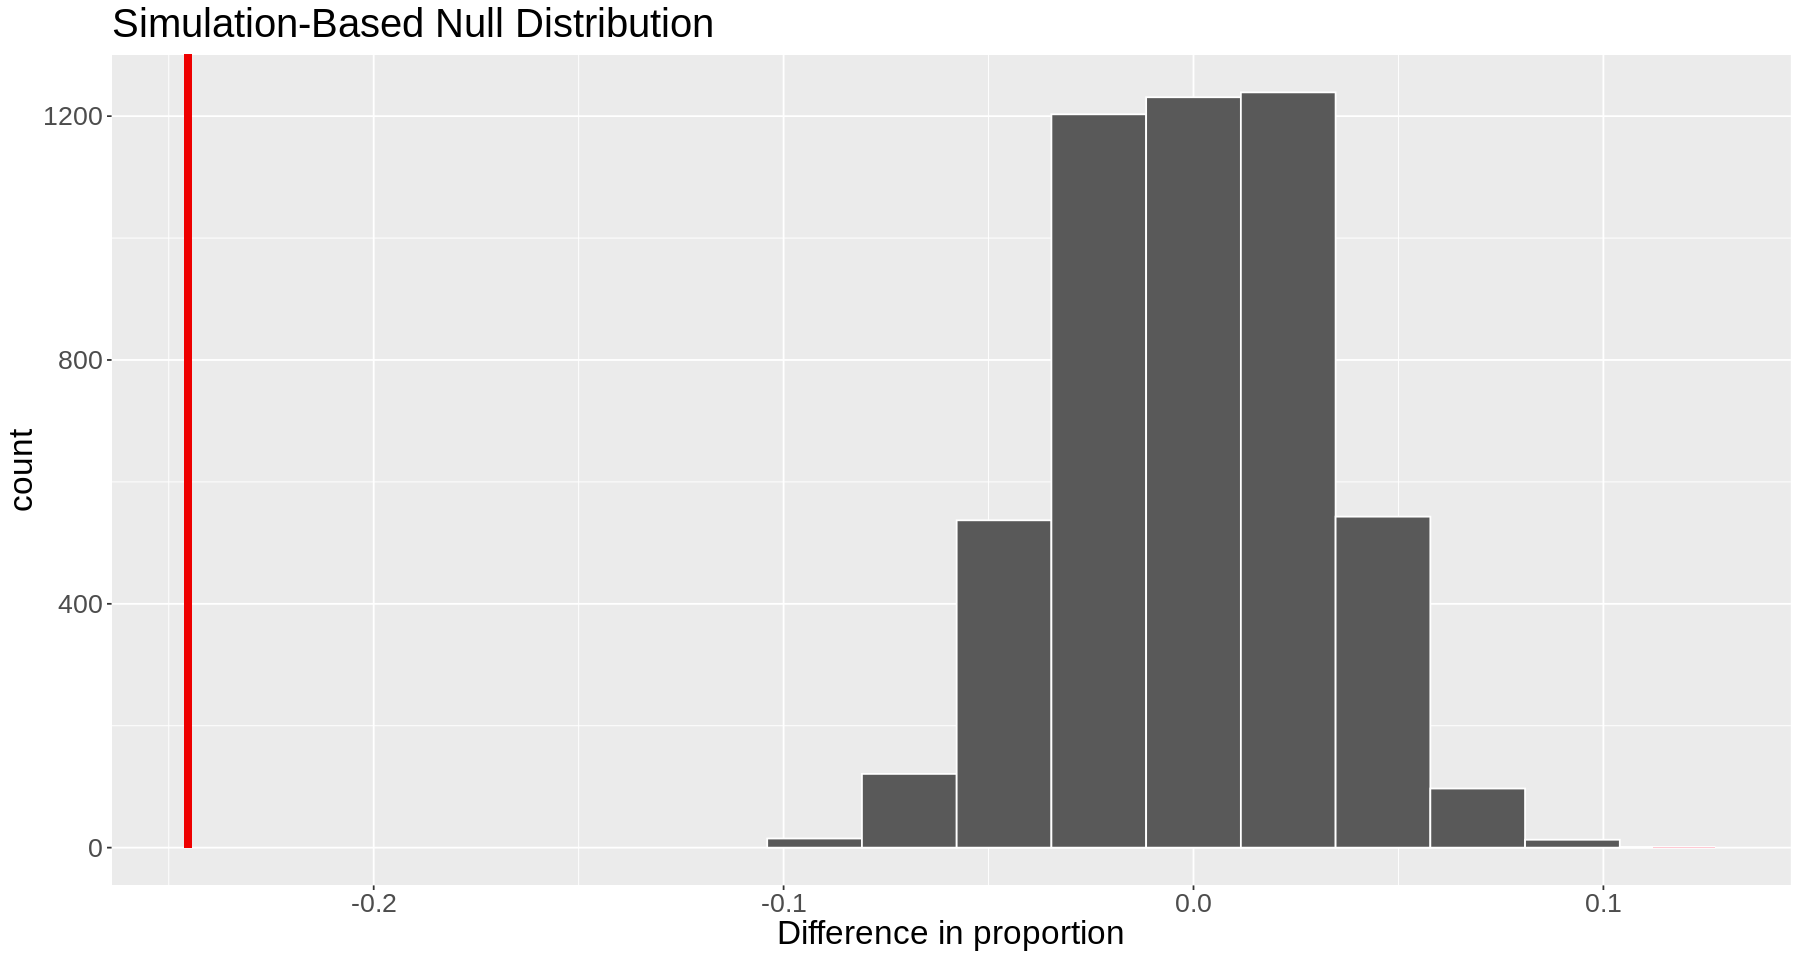

In [18]:
prop_diff_plot <- null_diff_in_props %>%
    visualize(obs_stat = obs_diff_in_prop, bins = 10, direction = "two sided") + 
    shade_p_value(obs_stat = obs_diff_in_prop, direction = "both") +
    xlab("Difference in proportion") +
    theme(text = element_text(size = 20))

prop_diff_plot

Figure C. Simulation-Based Null Distribution with Observed Test Statistic

Cleary, we can see that the test statistic fall very far outside of the distrubution tails, indicating that there is a difference in proportions between east and west sides. It also falls outside the 95% confidence interval, which is another indication that the distributions for east and west sides are not the same. To confirm this, we calculated the p-value from the generated null distribution to find the probability of observing a test statistic as extreme or more under the null hypothesis. 

In [19]:
p_value <- null_diff_in_props %>%
    get_p_value(obs_stat = obs_diff_in_prop, direction = "both")
p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


Table 11. P-value

We reject the null hypothesis at the significance level $alpha$ = 0.05 since the p-value is less than alpha. Thus, based on the permutation test we conclude that the proportions of single family homes between the East and West sides are not equal.

### ii) Z-Test

Next we will conduct a z-test for the same hypothesis to compare parametric and non-parametric methods. The non-parametric permutation test does not rely on a underlying distrubution, while the z-test assumes the distribution is normal under the null hypothesis. 

We can use z-test despite not knowing if the population is normally distributed, because according to the central limit theorem, the sample size is large enough to approximate the normality condition of the test. 

In [20]:
nE <- prop_east$n

nW <- prop_west$n

ztest <- prop.test(x=c(nE, nW), n=c(500, 500), correct=FALSE)
df <- tidy(ztest)

t(df)

estimate1,0.464
estimate2,0.232
statistic,59.3047
p.value,1.350534e-14
parameter,1
conf.low,0.1747315
conf.high,0.2892685
method,2-sample test for equality of proportions without continuity correction
alternative,two.sided


Table 12. Z-test Results


Similarily to the permutation test, we reject the null hypothesis at the significance level $alpha$ = 0.05 since the p-value is less than alpha. Thus, based on the permutation test we conclude that the proportions of single family homes between the East and West sides are not equal. The confidence interval for difference in proportions between the two neighbourhoods is [0.208, 0.324].

### Comparing the Two Methods:

In comparison, the permutation test and z-test gave very similar p-values, both close to 0. Using both non-parametric and parametric methods gives more assurance that the results are trustworthy. Overall, both methods will give similar results as long as the assumptions of the test are not broken. Here we had independent observations and a very large sample size of 500, which allowed us to rely on the central limit theorem that the estimator is asymptotically normal. In reality, it can sometimes be hard to determine whether a sample meets the conditions such as independence from a dataset collected by others, so using both methods is more reliable. However, if the asymptotic approximation is accurate, oftentimes the parametric assumptions of the Z-test give more power than the permutation test. In our case, either method will provide an accurate result. 

In addition, we used bootstrapping and asymptotics to calculate confidence intervals for the difference in proportion. Both methods gave almost identical results, indicating that the analysis is reliable. The main advantage of bootstrapping is that it doesn't rely on the assumption that the population is normally distributed. However, in order for bootstrapping to work well, the sample needs to be representative of the population. Since we had access to the entire population, the random sample was representative. In comparison, the assumptions of asymptotic normality need to be met in order for the Z-test confidence interval to be accurate. Since these assumptions were met, this method also performed very well. Overall, in our case both methods produced very trustworthy results so either could be used. 

## Part 2: Exploring Median Land Value for Residential Homes in the East  and West sides of Vancouver

### 2. a) Preprocessing and EDA for Median Land Value

In part 1. a): we already took a sample of 500 for each side, so we can reuse the sample from the proportion of single family homes and use it for the sample of median land values.

In [21]:
set.seed(123)
west_2021_sample <- 
    west_2021_sample %>% 
    mutate(CURRENT_LAND_VALUE = as.integer(CURRENT_LAND_VALUE))

east_2021_sample <- east_2021_sample %>%
    mutate(CURRENT_LAND_VALUE = as.integer(CURRENT_LAND_VALUE))

Next we take 5000 bootstrap samples of 500 from each random sample, and calculate the median of each replicate.

In [22]:
set.seed(123)

west_2021_bootstrapped <- west_2021_sample %>% 
    rep_sample_n(reps = 5000, size = 500, replace = TRUE) %>% 
    group_by(replicate) %>% 
    summarize(bootstrap_median = median(CURRENT_LAND_VALUE, ))

east_2021_bootstrapped <- east_2021_sample %>% 
    rep_sample_n(reps = 5000, size = 500, replace = TRUE) %>% 
    group_by(replicate) %>% 
    summarize(bootstrap_median = median(CURRENT_LAND_VALUE, ))

The sample medians for the west side and east side are calculated below.

In [23]:
west_param <- median(west_2021_bootstrapped$bootstrap_median)
west_param

[1] 794000

In [24]:
east_param <- median(east_2021_bootstrapped$bootstrap_median)
east_param

[1] 1199000

Then, a confidence interval is calculated for each sample median.

In [25]:
west_2021_ci <- west_2021_bootstrapped %>% 
    summarize(ci_lower = quantile(bootstrap_median, 0.05),
              ci_upper = quantile(bootstrap_median, 0.95))
west_2021_ci

east_2021_ci <- east_2021_bootstrapped %>% 
    summarize(ci_lower = quantile(bootstrap_median, 0.05),
              ci_upper = quantile(bootstrap_median, 0.95))
east_2021_ci

ci_lower,ci_upper
<dbl>,<dbl>
704500,920000


ci_lower,ci_upper
<dbl>,<dbl>
1180000,1225000


Tables 13 and 14. West and East Bootstap Confidence Intervals

Lastly, the bootstrap distributions are plotted below. This allows us to get a general idea of the distribution of median land values.

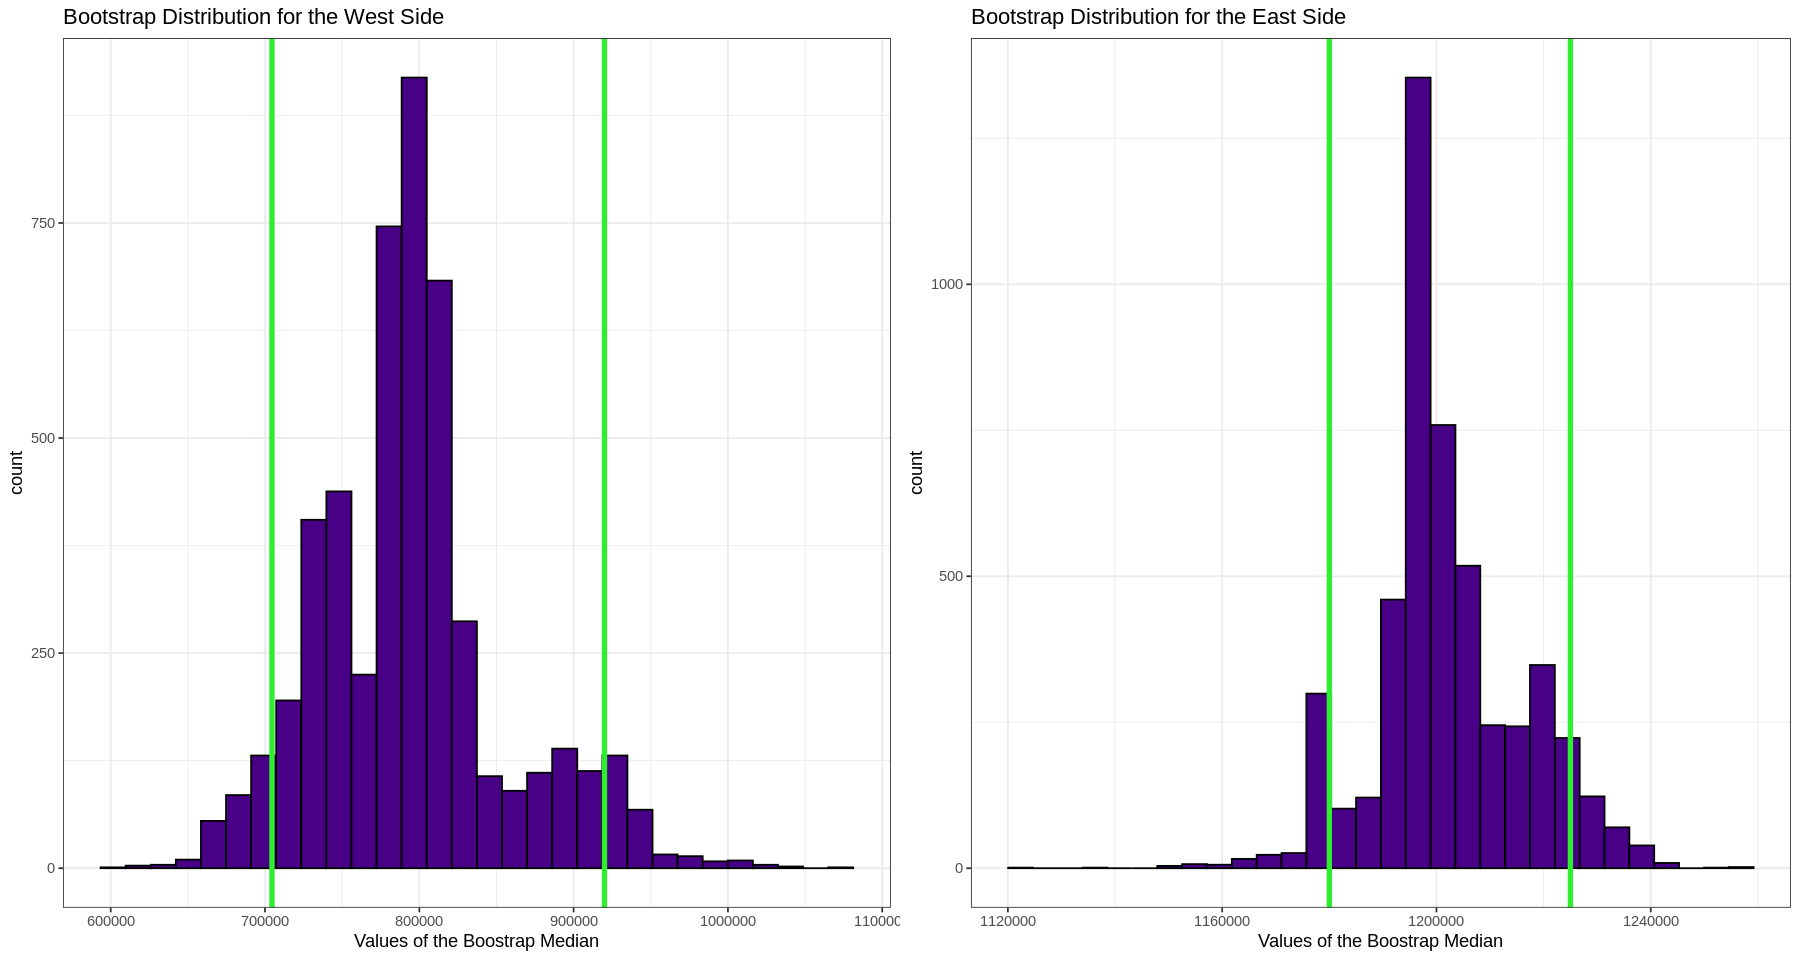

In [26]:
options(repr.plot.width=15, repr.plot.height=8)
options(scipen=999)

west_2021_plot <- west_2021_bootstrapped %>% 
    ggplot(aes(x = bootstrap_median)) +
    geom_histogram(bins = 30, fill = "#480087", colour = "black") + 
    geom_vline(xintercept = west_2021_ci[[1]], colour = "#2fed2f", size = 1.5) +
    geom_vline(xintercept = west_2021_ci[[2]], colour = "#2fed2f", size = 1.5)+
theme_bw()+
labs(x="Values of the Boostrap Median", title = "Bootstrap Distribution for the West Side")

east_2021_plot <- east_2021_bootstrapped %>% 
    ggplot(aes(x = bootstrap_median)) +
    geom_histogram(bins = 30, fill = "#480087", colour = "black") + 
    geom_vline(xintercept = east_2021_ci[[1]], colour = "#2fed2f", size = 1.5) +
    geom_vline(xintercept = east_2021_ci[[2]], colour = "#2fed2f", size = 1.5)+
theme_bw()+
labs(x="Values of the Boostrap Median", title = "Bootstrap Distribution for the East Side")

plot_grid(west_2021_plot, east_2021_plot)

Figure D. Bootstrap Distributions for East and West sides

Upon quick inspection on the bootstrap distributions for the East and West sides, the East side has a noticeably larger median over the course of multiple repetitions.

### b) Hypothesis Testing for Median Land Value

To test if there is a difference in the median land values on the east and west sides, we will perform a permutation test and use a bootstrap confidence interval to support or contradict our test. A 5% significance level will be used again for consistency, and for the purpose that it may reduce the probability of committing a type 1 error.

$H_{0}$ = The median land values between East and West sides of Vancouver are equal

$H_{A}$ = The median land values between East and West sides of Vancouver are not equal

#### i) Permutation Test for Median Land Value

To start off performing a permutation test, we first calculate the observed test value from the data.

In [27]:
obs_diff_in_medians <- 
    land_value_data %>% 
    specify(formula = CURRENT_LAND_VALUE ~ location) %>%
    calculate(stat = "diff in medians", order = c("west", "east"))  
obs_diff_in_medians

stat
<int64>
-435000


Table 15. Observed Difference in Medians

We then combine our west and east samples and select the values relating to the location and land value.

In [28]:
# combines west and east sample into one
sample_2021_land <- rbind(west_2021_sample, east_2021_sample)

Like with the proportion of single family homes, we can use a permutation test because it's a non-parametric test that doesn't rely on data from any underlying distribution.



In [29]:
set.seed(123)
null_diff_in_medians <- 
    sample_2021_land %>%
    specify(formula = CURRENT_LAND_VALUE ~ location) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 5000, type = "permute")  %>%
    calculate(stat = "diff in medians", order = c("west", "east"))

A simulation-based null distribution is then produced with the observed test statistic to get a visualization of the difference in medians.

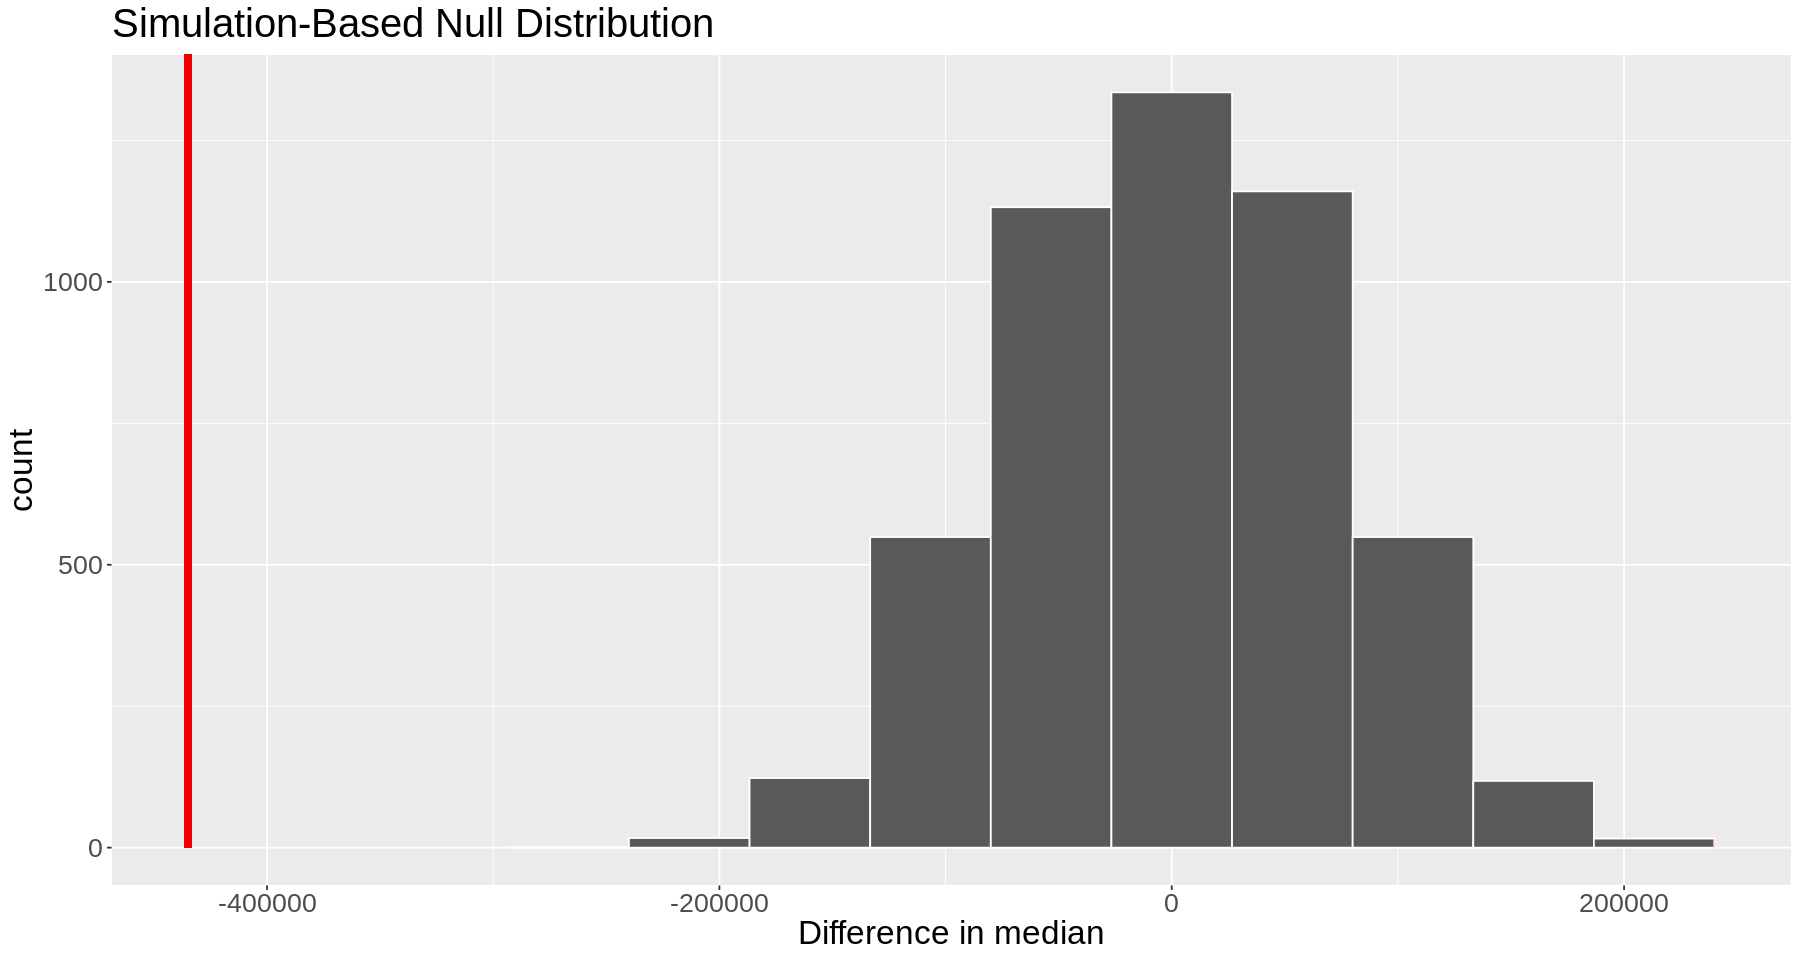

In [30]:
diff_in_medians_plot <-
    visualize(null_diff_in_medians, bins = 10) + 
    shade_p_value(obs_stat = as.integer(obs_diff_in_medians$stat), direction = "both") +
    xlab("Difference in median") +
    theme(text = element_text(size = 20))

diff_in_medians_plot

Figure E.  Simulation-Based Null Distribution for the Difference in Median Land Value



Just like with the null distribution of single family homes, there is a clear difference between the observed statistic compared to the null distribution of median land values, as it is to the left of every recorded difference by a large margin. We then confirm this by calculating the p-value which is generated from the null distribution generated earlier to get the probability of the observed test statistic under the null hypothesis.

Next, the p-value was calculated below.

In [31]:
# p value via bootstrapping
null_diff_in_medians %>% 
    get_p_value(obs_stat =  obs_diff_in_medians, direction = "both")

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


Table 16. P-value for the Difference in Median Land Value

The method leaves us with a p-value of 0, meaning that there is no data in the sample that meets the requirements. This suggests that a type 1 error is impossible, which would be very unlikely. As we performed 5000 repetitions, we can assume that the p-value is less than 0.0002. Given a p=value < 0.0002, we can deny the null hypothesis at a 5% significance level and conclude that the median land values between West and East Vancouver are not equal.


#### ii) Bootstrap Confidence Interval for Median Land Values

Next, we can create a bootstrap distribution to calculate a confidence interval for the differences in median land values. This will allow us to get another perspective on the permutation test by seeing how bootstrapping the sample would differ from the permutation test. With the amount of data we have, there is enough room for 5000 bootstrap repetitions.

In [32]:
set.seed(123)
diff_in_medians_bootstrap_dist <- 
    sample_2021_land %>% 
    specify(formula = CURRENT_LAND_VALUE ~ location) %>%
    generate(reps = 5000, size = 500, type = "bootstrap")  %>%
    calculate(stat = "diff in medians", order = c("west", "east"))


We can then calculate the 95% confidence interval from the bootstrap distribution data.


In [33]:
diff_in_medians_ci <-
    diff_in_medians_bootstrap_dist %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
diff_in_medians_ci

lower_ci,upper_ci
<dbl>,<dbl>
-518025,-261000


Table 17. 95% Confidence Interval

With the calculated confidence interval we can interpret by claiming that the difference in medians of a sample lies between [-518025, -261000] 95% of the time. We can then visualize the bootstrap distribution of the difference in medians with the previously calculated confidence interval.


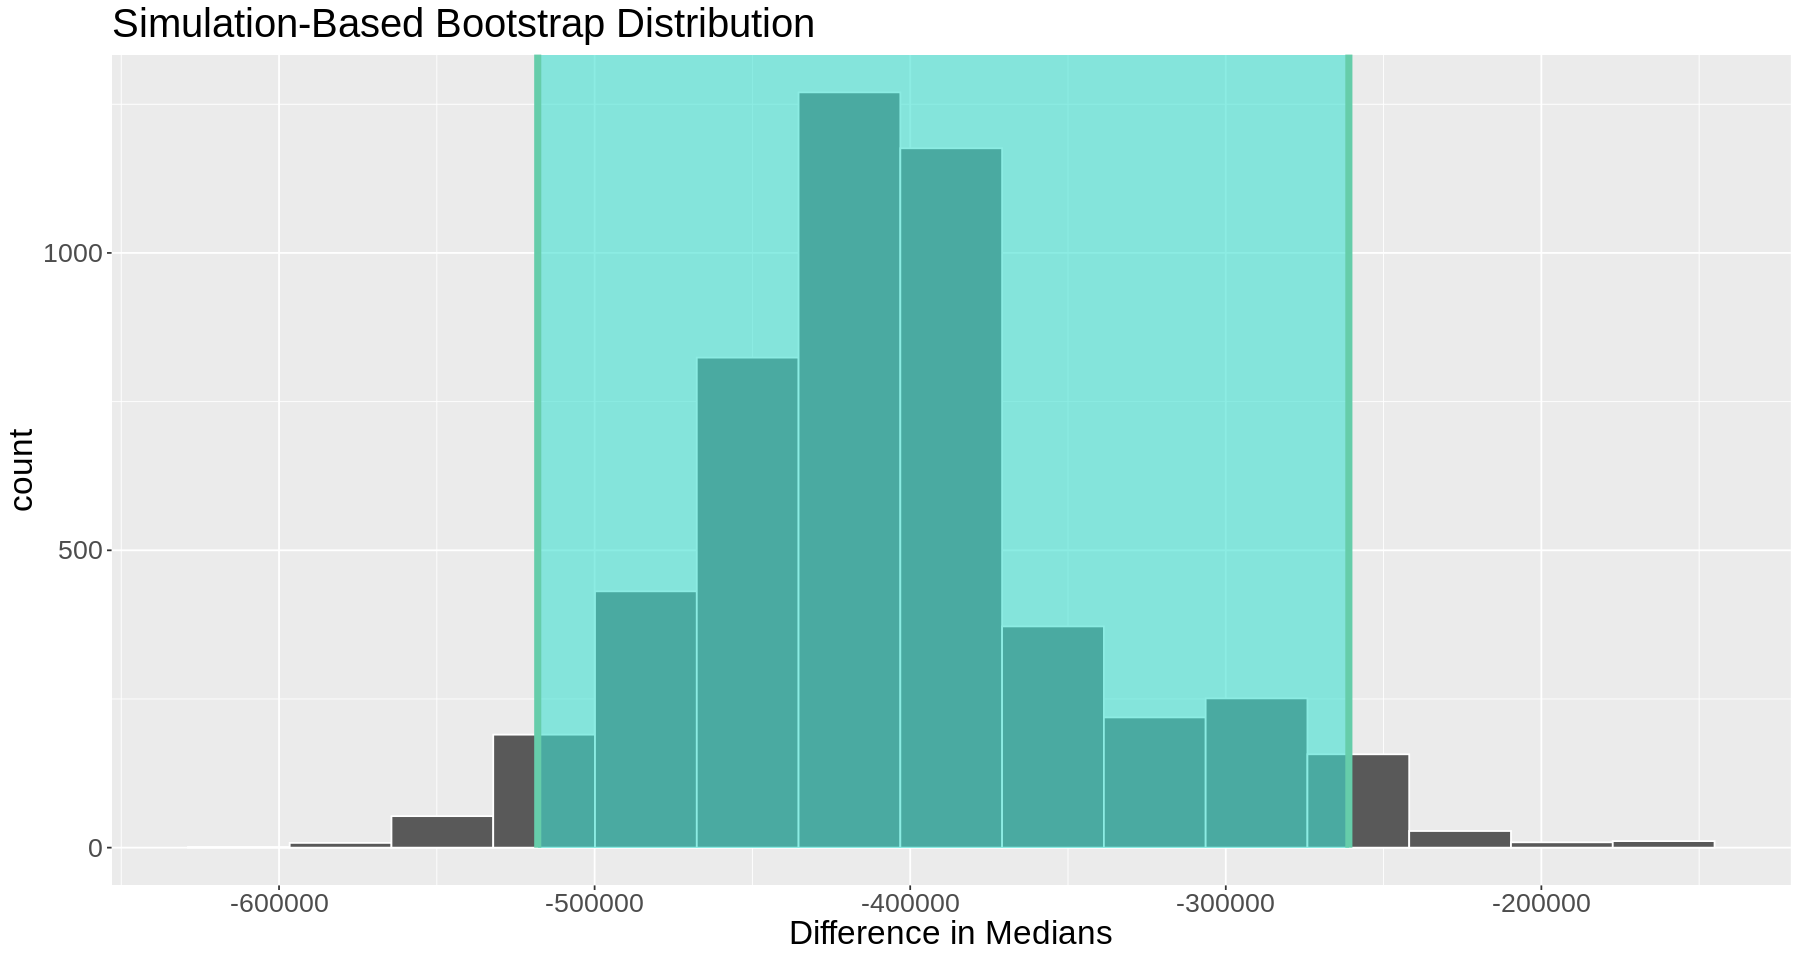

In [34]:
diff_in_medians_ci_plot <-
    visualize(diff_in_medians_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_medians_ci) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Medians")
diff_in_medians_ci_plot

Figure F. Simulation-Based Bootstrap Distribtution with Shaded Confidence Interval 

In this plot, we can see that none of the samples happened to reach a difference of medians of 0 between west and east.

### Comparing the Two Methods:

When comparing the two methods, both the confidence interval and the permutation test gave extremely similar results, meaning that the analysis is reliable. The permutation test gave a p-value close to 0 while the confidence interval produced from bootstrapping only ranges in the negatives, which means that most of the bootstrap median differences weren't close to being equal. Neither method produced any replicate where the median land values were equal, and the East side always had a higher median than the West side in the repetitions produced.

## Discussion

#### 1. Summarize what you found, and the implications/impact of your findings.

We found that the difference in median land values of residential properties in West and East Vancouver was “-435000,” where we are 95% confident it lies between -518025, and -261000. Moreover, we found that the difference in proportions of single-family dwelling in West and East Vancouver is -0.24 with 95% confidence it lies between -0.17 and -0.29.

Based on the results, I think this sheds light on the role zoning regulations play in a housing crisis. Understanding this role should aid in our understanding and ability to avert further housing crises.

#### 2. If relevant, discuss whether your results were what you expected to find.

Only some of our results were consistent with what we expected to find based on our preliminary analysis and existing research. We were expecting to find that the area with a higher land median value would also have a higher proportion of single family housing. This result was true as East Vancouver had a higher land median value and also a higher proportion of single-family dwellings. 
We expected that the proportion of single family housing in West Vancouver to be significantly higher than in East Vancouver. However, that was not true because we found that West Vancouver had a lower proportion of single-family housing specifically due to the downtown area which is populated with multi-family dwellings. Additionally, we expected to find a higher median-land value for the western area of Vancouver, but our findings resulted in the opposite. While our prediction on the trend between single-family housing and median land value was correct, we did not predict that East Vancouver would have a larger proportion of single-family housing and a higher median land value.

#### 3. Discuss future questions/research this study could lead to.
a) What factors other than zoning regulation lead to such a dramatic increase in housing prices? In addition, what are some potential solutions to avert the housing crisis present? 

b) How do the trend of land values contrast between residential homes and non-residential areas over the years?

c) Over a span of time, how do the housing prices and proportion of single-family homes to non-single-family homes compare – would it be likely to observe an increase or decrease in these values?

d) To what extent could we expect the median land values in between certain neighborhoods, within the East and West sides of Vancouver, to compare?

## References 

1. Glaeser, E. L., & Gyourko, J. (2002). The Impact of Zoning on Housing Affordability (SSRN Scholarly Paper ID 303557). Social Science Research Network. https://papers.ssrn.com/abstract=303557
2. Pablo, C. (2021). Rising Vancouver home prices narrow “once great divide between East and West into thin, fine line”. The Georgia Straight. 
https://www.straight.com/news/rising-vancouver-home-prices-narrow-once-great-divide-between-east-and-west-into-thin-fine-line
3. Kergin, B. (2021, June 7). The East Side-West Side Split in Vancouver Real Estate is Changing (MAP). Vancouver is Awesome. 
https://www.vancouverisawesome.com/real-estate/the-east-side-west-side-split-in-vancouver-real-estate-is-changing-map-3852383 
4. Property tax report. City of Vancouver, BC Assessment. https://opendata.vancouver.ca/explore/dataset/property-tax-report/
5. Schuetz, J. (2020, January 7). To improve housing affordability, we need better alignment of zoning, taxes, and subsidies. Brookings. https://www.brookings.edu/policy2020/bigideas/to-improve-housing-affordability-we-need-better-alignment-of-zoning-taxes-and-subsidies/